In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
chess_king_rook_vs_king = fetch_ucirepo(id=23)

# data (as pandas dataframes)
X = chess_king_rook_vs_king.data.features
y = chess_king_rook_vs_king.data.targets

# metadata
print(chess_king_rook_vs_king.metadata)

# variable information
print(chess_king_rook_vs_king.variables)

{'uci_id': 23, 'name': 'Chess (King-Rook vs. King)', 'repository_url': 'https://archive.ics.uci.edu/dataset/23/chess+king+rook+vs+king', 'data_url': 'https://archive.ics.uci.edu/static/public/23/data.csv', 'abstract': 'Chess Endgame Database for White King and Rook against Black King (KRK).', 'area': 'Games', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 28056, 'num_features': 6, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['white-depth-of-win'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Sat Mar 09 2024', 'dataset_doi': '10.24432/C57W2S', 'creators': ['Michael Bain', 'Arthur Hoff'], 'intro_paper': None, 'additional_info': {'summary': "An Inductive Logic Programming (ILP) or relational learning framework is assumed (Muggleton, 1992). The learning system is provided with examples of chess positions described only by the coordinates

In [4]:
df = pd.merge(X, y, left_index=True, right_index=True)
df.head()

,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,white-depth-of-win
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


In [5]:
df.dtypes

white-king-file         str
white-king-rank       int64
white-rook-file         str
white-rook-rank       int64
black-king-file         str
black-king-rank       int64
white-depth-of-win      str
dtype: object

In [6]:
df[[c for c in df.columns if "file" in c]] = df[[c for c in df.columns if "file" in c]].map(lambda x: ord(x) - ord("a") + 1)

In [7]:
df.dtypes

white-king-file       int64
white-king-rank       int64
white-rook-file       int64
white-rook-rank       int64
black-king-file       int64
black-king-rank       int64
white-depth-of-win      str
dtype: object

In [8]:
df["white-depth-of-win"].unique()

<StringArray>
[    'draw',     'zero',      'one',      'two',    'three',     'four',
     'five',      'six',    'seven',    'eight',     'nine',      'ten',
   'eleven',   'twelve', 'thirteen', 'fourteen',  'fifteen',  'sixteen']
Length: 18, dtype: str

In [9]:
depth_strs = ['draw', 'zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen', 'sixteen']
depth_strs = { s: i-1 for i, s in enumerate(depth_strs) }
depth_strs

{'draw': -1,
 'zero': 0,
 'one': 1,
 'two': 2,
 'three': 3,
 'four': 4,
 'five': 5,
 'six': 6,
 'seven': 7,
 'eight': 8,
 'nine': 9,
 'ten': 10,
 'eleven': 11,
 'twelve': 12,
 'thirteen': 13,
 'fourteen': 14,
 'fifteen': 15,
 'sixteen': 16}

In [10]:
df["white-depth-of-win"] = df["white-depth-of-win"].map(depth_strs)

In [11]:
df.head()

,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,white-depth-of-win
0,1,1,2,3,3,2,-1
1,1,1,3,1,3,2,-1
2,1,1,3,1,4,1,-1
3,1,1,3,1,4,2,-1
4,1,1,3,2,3,1,-1


# Pytanie 1 [2pkt.]

Gdzie zwykle znajduje się na planszy czarny król, kiedy jest matowany (`white-depth-of-win=0`)? Gdzie znajduje się, kiedy gra kończy się remisem (`white-depth-of-win=-1`)?

In [78]:
board = np.zeros((8, 8), dtype=int)
count = df.iloc[df["white-depth-of-win"] == 0, :].groupby(["black-king-file", "black-king-rank"]).size().reset_index(name="count")
board[count["black-king-rank"] - 1, count["black-king-file"] - 1] = count["count"]

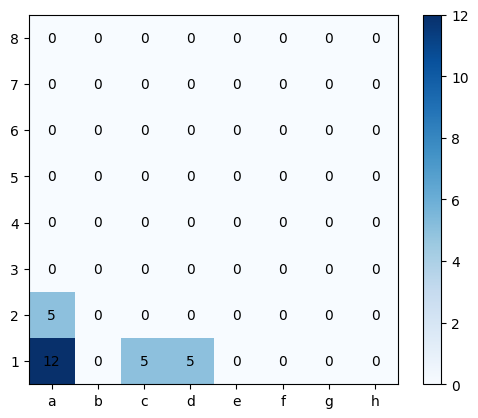

In [79]:
b = board
b = b / np.sum(b) * 100
plt.imshow(board, cmap="Blues", origin="lower")
plt.xticks(ticks=np.arange(8), labels=[chr(ord("a") + i) for i in range(8)])
plt.yticks(ticks=np.arange(8), labels=[i + 1 for i in range(8)])
plt.colorbar()
for i in range(8):
    for j in range(8):
        plt.text(i, j, board[j, i], ha="center", va="center", color="black")

Czarny król zwykle znajduje się w rogu planszy (dowolnym, biorąc pod uwagę symetrie) lub rzadziej przy krawędzi. Jest to spodziewane, nie da się zamatować go w innym miejscu, a w rogu jest najłatwiej. Po uwzględnieniu symetrii widać ładny równomierny rozkład przy krawędziach:

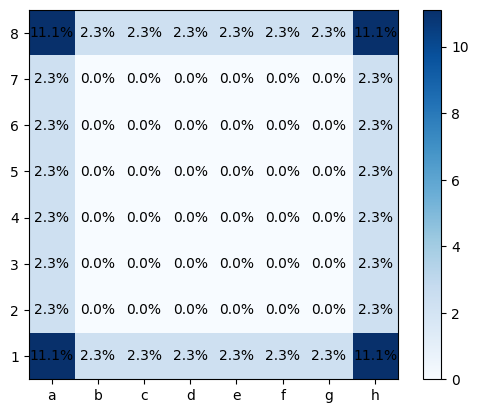

In [81]:
b = board + board[::-1]
b = b + b[:, ::-1]
b = b + b.T
b = b / np.sum(b) * 100
plt.imshow(b, cmap="Blues", origin="lower")
plt.xticks(ticks=np.arange(8), labels=[chr(ord("a") + i) for i in range(8)])
plt.yticks(ticks=np.arange(8), labels=[i + 1 for i in range(8)])
plt.colorbar()
for i in range(8):
    for j in range(8):
        plt.text(i, j, f"{b[j, i]:.1f}%", ha="center", va="center", color="black")

In [82]:
board = np.zeros((8, 8), dtype=int)
count = df.iloc[df["white-depth-of-win"] == -1, :].groupby(["black-king-file", "black-king-rank"]).size().reset_index(name="count")
board[count["black-king-rank"] - 1, count["black-king-file"] - 1] = count["count"]

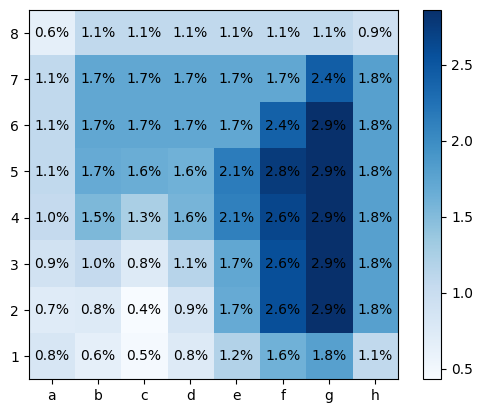

In [83]:
b = board
b = b / np.sum(b) * 100
plt.imshow(b, cmap="Blues", origin="lower")
plt.xticks(ticks=np.arange(8), labels=[chr(ord("a") + i) for i in range(8)])
plt.yticks(ticks=np.arange(8), labels=[i + 1 for i in range(8)])
plt.colorbar()
for i in range(8):
    for j in range(8):
        plt.text(i, j, f"{b[j, i]:.1f}%", ha="center", va="center", color="black")

Przy remisie czarny król może znajdować się praktycznie w dowolnym miejscu, trochę rzadziej przy krawędzi.
Po uwzględnieniu symetrii widać że rozkład jest dość równomierny:

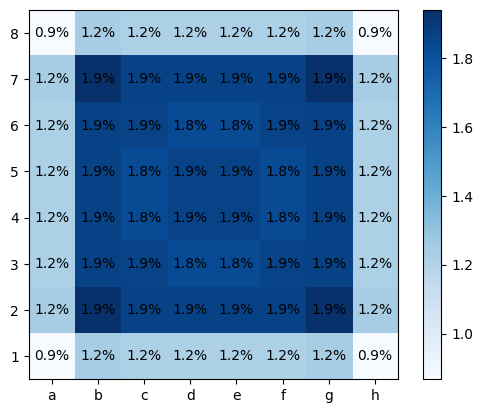

In [84]:
b = board + board[::-1]
b = b + b[:, ::-1]
b = b + b.T
b = b / np.sum(b) * 100
plt.imshow(b, cmap="Blues", origin="lower")
plt.xticks(ticks=np.arange(8), labels=[chr(ord("a") + i) for i in range(8)])
plt.yticks(ticks=np.arange(8), labels=[i + 1 for i in range(8)])
plt.colorbar()
for i in range(8):
    for j in range(8):
        plt.text(i, j, f"{b[j, i]:.1f}%", ha="center", va="center", color="black")

# Pytanie 2 [2pkt.]

Jednym z istotnych czynników tego, w ilu ruchach gra się zakończy jest dystans pomiędzy białym królem a czarnym królem. Jaka metryka dystansu (Euklidesowa, Manhattan, lub Czebyszewa) pomiędzy nimi pozwoli najlepiej oszacować liczbę ruchów do zakończenia gry? Do tej analizy zignoruj sytuacje remisowe (`white-depth-of-win` = -1).

In [85]:
df2 = df[df["white-depth-of-win"] >= 0].copy()
file = df2["black-king-file"] - df2["white-king-file"]
rank = df2["black-king-rank"] - df2["white-king-rank"]
df2["manhattan"] = file.abs() + rank.abs()
df2["euclidean"] = np.sqrt(file**2 + rank**2)
df2["chebyshew"] = np.maximum(file.abs(), rank.abs())

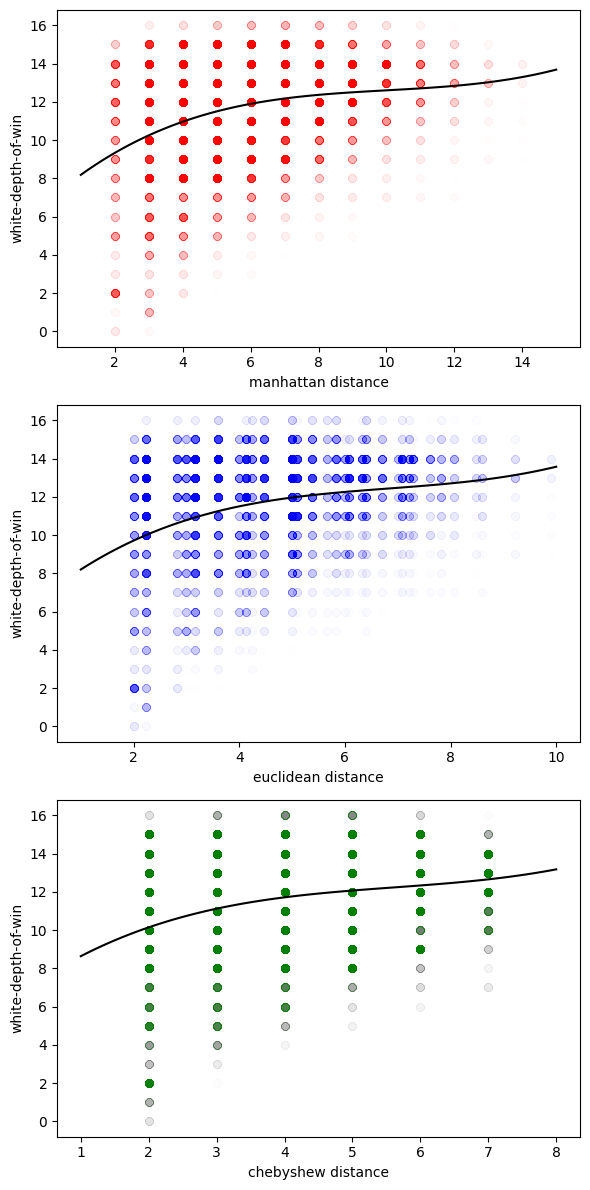

In [37]:
fig, axs = plt.subplots(3, 1, figsize=(6, 12))
axs[0].scatter(df2["manhattan"], df2["white-depth-of-win"], alpha=0.002, color="red", label="manhattan")
p = np.poly1d(np.polyfit(df2["manhattan"], df2["white-depth-of-win"], deg=3))
x = np.linspace(1, 15, 100)
axs[0].plot(x, p(x), color="black")
axs[0].set_xlabel("manhattan distance")
axs[0].set_ylabel("white-depth-of-win")
axs[1].scatter(df2["euclidean"], df2["white-depth-of-win"], alpha=0.002, color="blue", label="euclidean")
p = np.poly1d(np.polyfit(df2["euclidean"], df2["white-depth-of-win"], deg=3))
x = np.linspace(1, 10, 100)
axs[1].plot(x, p(x), color="black")
axs[1].set_xlabel("euclidean distance")
axs[1].set_ylabel("white-depth-of-win")
axs[2].scatter(df2["chebyshew"], df2["white-depth-of-win"], alpha=0.002, color="green", label="chebyshew")
p = np.poly1d(np.polyfit(df2["chebyshew"], df2["white-depth-of-win"], deg=3))
x = np.linspace(1, 8, 100)
axs[2].plot(x, p(x), color="black")
axs[2].set_xlabel("chebyshew distance")
axs[2].set_ylabel("white-depth-of-win")
plt.tight_layout()

In [18]:
df2.corr()["white-depth-of-win"][["manhattan", "euclidean", "chebyshew"]]

manhattan    0.296696
euclidean    0.290681
chebyshew    0.266009
Name: white-depth-of-win, dtype: float64

Wszystkie metryki mają podobne dopasowanie i korelację, Manhattan wypada delikatnie lepiej.

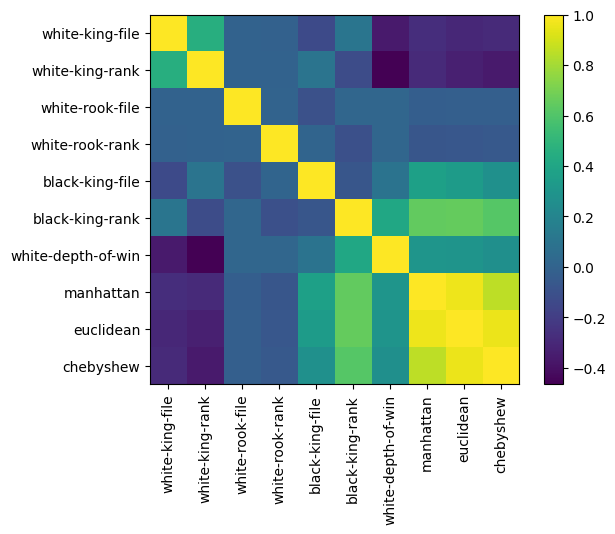

In [19]:
plt.imshow(df2.corr())
plt.xticks(ticks=np.arange(len(df2.corr().columns)), labels=df2.corr().columns, rotation=90)
plt.yticks(ticks=np.arange(len(df2.corr().columns)), labels=df2.corr().columns)
plt.colorbar()

# Pytanie 3 [2pkt.]

Czy informacja o odległości czarnego króla od krawędzi planszy może być przydatna w określeniu w ilu ruchach zakończy się gra? Czy uzupełnienie tej informacji o odległość pomiędzy białym a czarnym królem z poprzedniego zadania może dodatkowo pomóc? Do tej analizy zignoruj sytuacje remisowe (`white-depth-of-win` = -1).

In [22]:
df3 = df2.copy()
file = df3["black-king-file"]
rank = df3["black-king-rank"]
min_dist = np.minimum.reduce([file - 1, 8 - file, rank - 1, 8 - rank])
df3["min-dist-to-edge"] = min_dist
# file = df3["black-king-file"] - df3["white-king-file"]
# rank = df3["black-king-rank"] - df3["white-king-rank"]
# df3["manhattan"] = file.abs() + rank.abs()
# df3["euclidean"] = np.sqrt(file**2 + rank**2)
# df3["chebyshew"] = np.maximum(file.abs(), rank.abs())

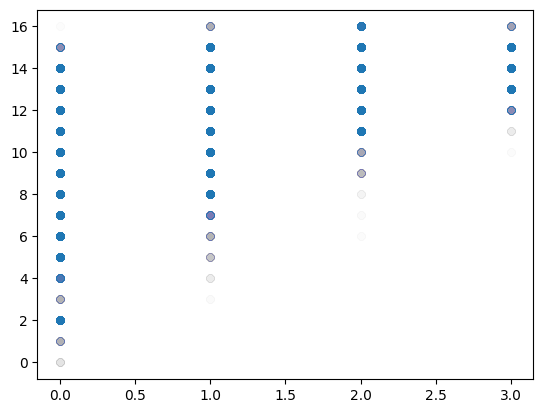

In [23]:
plt.scatter(df3["min-dist-to-edge"], df3["white-depth-of-win"], alpha=0.003, label="min-dist-to-edge")

In [26]:
df3.groupby(["min-dist-to-edge", "chebyshew"])["white-depth-of-win"].std()

min-dist-to-edge  chebyshew
0                 2            3.757190
                  3            2.610989
                  4            2.257361
                  5            1.907276
                  6            1.711607
                  7            1.646448
1                 2            2.830266
                  3            2.022496
                  4            1.650512
                  5            1.315621
                  6            1.122512
2                 2            1.814202
                  3            1.339494
                  4            1.126363
                  5            0.846458
3                 2            0.968441
                  3            0.803083
                  4            0.731989
Name: white-depth-of-win, dtype: float64

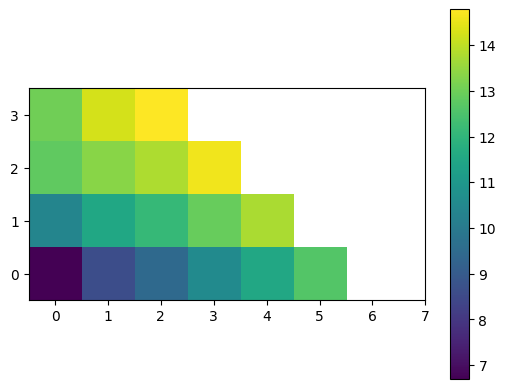

In [25]:
plt.imshow(df3.groupby(["min-dist-to-edge", "chebyshew"])["white-depth-of-win"].mean().unstack(), origin="lower")
plt.xticks(ticks=np.arange(8), labels=np.arange(8))
plt.yticks(ticks=np.arange(4), labels=np.arange(4))
plt.colorbar()

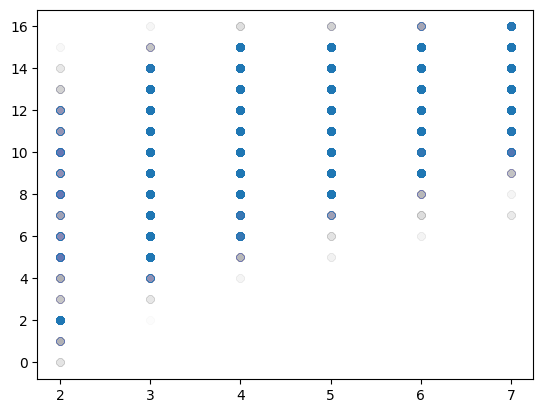

In [ ]:
df3["sum-dist"] = df3["min-dist-to-edge"] + df3["chebyshew"]
plt.scatter(df3["sum-dist"], df3["white-depth-of-win"], alpha=0.003, label="sum-dist")

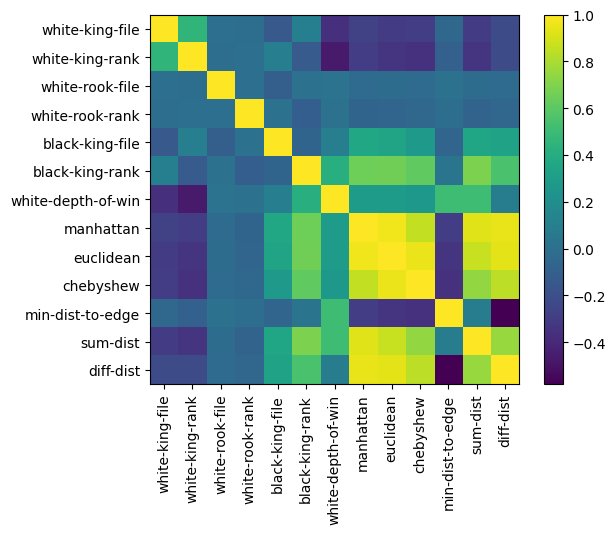

In [41]:
df3["sum-dist"] = df3["min-dist-to-edge"] + df3["manhattan"]
df3["diff-dist"] = df3["manhattan"] - df3["min-dist-to-edge"]
plt.imshow(df3.corr())
plt.xticks(ticks=np.arange(len(df3.corr().columns)), labels=df3.corr().columns, rotation=90)
plt.yticks(ticks=np.arange(len(df3.corr().columns)), labels=df3.corr().columns)
plt.colorbar()